# 検証機
※コピーして使ってください  
コードが幼稚なのは許してください...

使い方  
①「ここを入力」のところにある、width(マップの一辺の長さ)とattempts(テスト回数)の値を好きな値に変更します。  
注)widthは、「11,14,16,18,20,30,100,200,1000」にのみ対応しています。それ以外はエラーが出ます。  
②左上にある再生ボタンみたいなボタンを1回押します。  
③下に結果が表示されます。

In [ ]:
#検定用リストのリセット
probability_ruins_tost = {2:[], 3:[], 4:[]}

マップサイズ :  40000
試行回数　　 :  1000
-------------------------------------------------------
村の数 :  3002.148
密度　 :  0.6755
村から3マス :  12.52 %
村から4マス :  7.44 %
村から5マス :  5.99 %
神殿(除外周)から2マス :  12.6 %
神殿(除外周)から3マス :  7.36 %
神殿(除外周)から4マス :  5.63 %
ランダムから1マス :  7.49 %
ランダムから2マス :  7.41 %
ランダムから3マス :  7.41 %
ランダムから4マス :  7.3 %
ランダムから5マス :  7.18 %


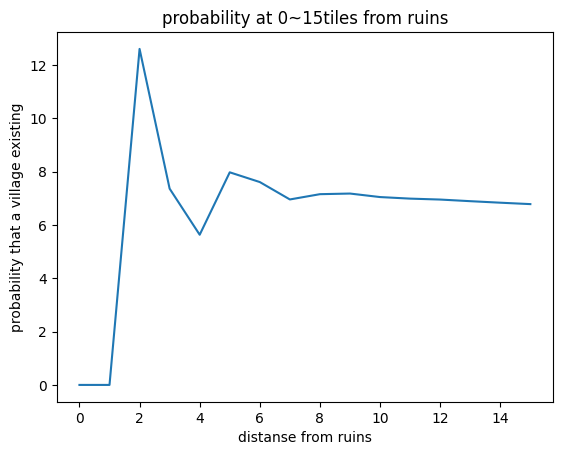

In [ ]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

#マップサイズと試行回数を定義   #        ／|　　　　　　　　　　    ここを入力
width = 200                     #     ／   |ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
attempts = 1000                 #     ＼   |ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
#いろいろ定義                   #        ＼|
total_allvillages = 0
total_villages = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}
total_inside_ruins = 0                                                                                                    #      ∧__∧ 　         　  ／￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣
total_ruins = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}                      #     (　･ω･)            ＜　初期設定で実行すると2時間かかるよ
total_random = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}                                                                             #   ＿(__つ/￣￣￣/_     　  ＼＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
map = np.zeros(0)                                                                                                         #       ＼/　pc　/　ｶﾀｶﾀ
ruins = {121:4, 196:5, 256:7, 324:9, 400:11, 900:23, 10000:270, 40000:1081, 1000000:27027}
#size/ruins 30.3  39.2   36.6    36    36.4    39.1     37.0        37.0        37.0
for i in range(attempts):
  #マップとか初期化
  map = np.zeros((width,width),dtype="i8")
  map = np.zeros((width,width),dtype="i8")
  map[0,:],map[-1,:],map[:,0],map[:,-1] = 1,1,1,1
  map[0,0],map[-1,0],map[0,-1],map[-1,-1] = 2,2,2,2
  count_allruins = 0

#----------------------------------------------------------------------------------------
  #村の配置ループ
  while 0 in map:
    #ランダムに座標(とその周囲2マス)を指定
    x,y = randint(1,width-2),randint(1,width-2)
    x0,x1,y0,y1 = max(x-2,0),min(x+3,width),max(y-2,0),min(y+3,width)
    #村(3)と領地(2)と村生成不可エリア(1)を配置
    if map[x,y] == 0:
      map[x0:x1,y0:y1] = np.maximum(map[x0:x1,y0:y1],1)
      map[x-1:x+2,y-1:y+2] = 2
      map[x,y] = 3
#----------------------------------------------------------------------------------------------

  #神殿の配置ループ
  while True:
    #ランダムに座標(とその周囲1マス)を指定
    x,y = randint(0,width-1),randint(0,width-1)
    x0,x1,y0,y1 = max(x-1,0),min(x+2,width),max(y-1,0),min(y+2,width)

    #神殿(4)と神殿成不可エリア(2)を配置
    if map[x,y] == 1:
      map[x0:x1,y0:y1] = 2
      map[x,y] = 4
      count_allruins += 1

    #神殿が上限に達したら終了
    if count_allruins >= ruins[width**2]:
      break;

#----------------------------------------------------------------------------------------------------------------------------------#

  #村の数をカウント
  total_allvillages += np.count_nonzero(map == 3)

  #345マス村の数をカウント
  position_village = np.argwhere(map == 3)
  count_villages = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

  for i,j in position_village:
    x30,x31,y30,y31 = max(i-3,0),min(i+4,width),max(j-3,0),min(j+4,width)
    x40,x41,y40,y41 = max(i-4,0),min(i+5,width),max(j-4,0),min(j+5,width)
    x50,x51,y50,y51 = max(i-5,0),min(i+6,width),max(j-5,0),min(j+6,width)
    count_villages[3] = np.sum(map[x30:x31,y30:y31] == 3) - 1
    count_villages[4] = np.sum(map[x40:x41,y40:y41] == 3) - count_villages[3] - 1
    count_villages[5] = np.sum(map[x50:x51,y50:y51] == 3) - count_villages[3] - count_villages[4] - 1
    total_villages[3] += count_villages[3]
    total_villages[4] += count_villages[4]
    total_villages[5] += count_villages[5]

  #神殿周りの村の数をカウント
  position_ruins = np.argwhere(map == 4)
  count_ruins = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0}

  for i,j in position_ruins:
    if 1<= i <= width-2 and 1 <= j <= width-2:  #外周は除く
      total_inside_ruins += 1

      x00,x01,y00,y01 = max(i-0,0),min(i+1,width),max(j-0,0),min(j+1,width)
      x10,x11,y10,y11 = max(i-1,0),min(i+2,width),max(j-1,0),min(j+2,width)
      x20,x21,y20,y21 = max(i-2,0),min(i+3,width),max(j-2,0),min(j+3,width)
      x30,x31,y30,y31 = max(i-3,0),min(i+4,width),max(j-3,0),min(j+4,width)
      x40,x41,y40,y41 = max(i-4,0),min(i+5,width),max(j-4,0),min(j+5,width)
      x50,x51,y50,y51 = max(i-5,0),min(i+6,width),max(j-5,0),min(j+6,width)
      x60,x61,y60,y61 = max(i-6,0),min(i+7,width),max(j-6,0),min(j+7,width)
      x70,x71,y70,y71 = max(i-7,0),min(i+8,width),max(j-7,0),min(j+8,width)
      x80,x81,y80,y81 = max(i-8,0),min(i+9,width),max(j-8,0),min(j+9,width)
      x90,x91,y90,y91 = max(i-9,0),min(i+10,width),max(j-9,0),min(j+10,width)
      x100,x101,y100,y101 = max(i-10,0),min(i+11,width),max(j-10,0),min(j+11,width)
      x110,x111,y110,y111 = max(i-11,0),min(i+12,width),max(j-11,0),min(j+12,width)
      x120,x121,y120,y121 = max(i-12,0),min(i+13,width),max(j-12,0),min(j+13,width)
      x130,x131,y130,y131 = max(i-13,0),min(i+14,width),max(j-13,0),min(j+14,width)
      x140,x141,y140,y141 = max(i-14,0),min(i+15,width),max(j-14,0),min(j+15,width)
      x150,x151,y150,y151 = max(i-15,0),min(i+16,width),max(j-15,0),min(j+16,width)

      count_ruins[0] = np.sum(map[i,j] == 3)
      count_ruins[1] = np.sum(map[x10:x11,y10:y11] == 3) - count_ruins[0]
      count_ruins[2] = np.sum(map[x20:x21,y20:y21] == 3)
      count_ruins[3] = np.sum(map[x30:x31,y30:y31] == 3) - count_ruins[2]
      count_ruins[4] = np.sum(map[x40:x41,y40:y41] == 3) - count_ruins[2] - count_ruins[3]
      count_ruins[5] = np.sum(map[x50:x51,y50:y51] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4]
      count_ruins[6] = np.sum(map[x60:x61,y60:y61] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5]
      count_ruins[7] = np.sum(map[x70:x71,y70:y71] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6]
      count_ruins[8] = np.sum(map[x80:x81,y80:y81] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7]
      count_ruins[9] = np.sum(map[x90:x91,y90:y91] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8]
      count_ruins[10] = np.sum(map[x100:x101,y100:y101] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9]
      count_ruins[11] = np.sum(map[x110:x111,y110:y111] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9] - count_ruins[10]
      count_ruins[12] = np.sum(map[x120:x121,y120:y121] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9] - count_ruins[10] - count_ruins[11]
      count_ruins[13] = np.sum(map[x130:x131,y130:y131] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9] - count_ruins[10] - count_ruins[11] - count_ruins[12]
      count_ruins[14] = np.sum(map[x140:x141,y140:y141] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9] - count_ruins[10] - count_ruins[11] - count_ruins[12] - count_ruins[13]
      count_ruins[15] = np.sum(map[x150:x151,y150:y151] == 3) - count_ruins[2] - count_ruins[3] - count_ruins[4] - count_ruins[5] - count_ruins[6] - count_ruins[7] - count_ruins[8] - count_ruins[9] - count_ruins[10] - count_ruins[11] - count_ruins[12] - count_ruins[13] - count_ruins[14]

      total_ruins[0] += count_ruins[0]
      total_ruins[1] += count_ruins[1]
      total_ruins[2] += count_ruins[2]
      total_ruins[3] += count_ruins[3]
      total_ruins[4] += count_ruins[4]
      total_ruins[5] += count_ruins[5]
      total_ruins[6] += count_ruins[6]
      total_ruins[7] += count_ruins[7]
      total_ruins[8] += count_ruins[8]
      total_ruins[9] += count_ruins[9]
      total_ruins[10] += count_ruins[10]
      total_ruins[11] += count_ruins[11]
      total_ruins[12] += count_ruins[12]
      total_ruins[13] += count_ruins[13]
      total_ruins[14] += count_ruins[14]
      total_ruins[15] += count_ruins[15]

  #ランダムな座標周りの村の数を10回カウント(コードや計算式に誤りがないか確認するため)
  count_random = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

  for n in range(10):
    i,j = randint(0,width-1),randint(0,width-1)
    x10,x11,y10,y11 = max(i-1,0),min(i+2,width),max(j-1,0),min(j+2,width)
    x20,x21,y20,y21 = max(i-2,0),min(i+3,width),max(j-2,0),min(j+3,width)
    x30,x31,y30,y31 = max(i-3,0),min(i+4,width),max(j-3,0),min(j+4,width)
    x40,x41,y40,y41 = max(i-4,0),min(i+5,width),max(j-4,0),min(j+5,width)
    x50,x51,y50,y51 = max(i-5,0),min(i+6,width),max(j-5,0),min(j+6,width)
    count_random[1] = np.sum(map[x10:x11,y10:y11] == 3) - np.sum(map[i,j] == 3)
    count_random[2] = np.sum(map[x20:x21,y20:y21] == 3) - np.sum(map[i,j] == 3) - count_random[1]
    count_random[3] = np.sum(map[x30:x31,y30:y31] == 3) - np.sum(map[i,j] == 3) - count_random[1] - count_random[2]
    count_random[4] = np.sum(map[x40:x41,y40:y41] == 3) - np.sum(map[i,j] == 3) - count_random[1] - count_random[2] - count_random[3]
    count_random[5] = np.sum(map[x50:x51,y50:y51] == 3) - np.sum(map[i,j] == 3) - count_random[1] - count_random[2] - count_random[3] - count_random[4]
    total_random[1] += count_random[1]
    total_random[2] += count_random[2]
    total_random[3] += count_random[3]
    total_random[4] += count_random[4]
    total_random[5] += count_random[5]


  #(最初のfor文おわり)
#----------------------------------------------------------------------------------------------------------------------------------#

#後処理
average_villages = total_allvillages/attempts
probability_villages = {3:0, 4:0, 5:0}
probability_ruins = {2:0, 3:0, 4:0}
probability_random = {1:0, 2:0, 3:0, 4:0, 5:0}

for i in range(3,6):
  probability_villages[i] = ( total_villages[i] / ( total_allvillages * i * 8 ) )
for i in range(2,5):
  probability_ruins[i] = ( total_ruins[i] / ( total_inside_ruins * i * 8 ) )
  if width == 18 and attempts == 1:
    probability_ruins_tost[i].append(probability_ruins[i] * 100)
for i in range(1,6):
  probability_random[i] = ( total_random[i] / ( 10 * attempts * i * 8 ) )

x_graph = range(16)
y_graph = [( total_ruins[0] * 100 )/1] + [( total_ruins[i] * 100 )/( total_inside_ruins * i * 8 ) for i in range(1,16)]

print("マップサイズ : ",width**2)
print("試行回数　　 : ",attempts)
print("-------------------------------------------------------")
print("村の数 : ", average_villages)
print("密度　 : ", round(average_villages*9/(width**2),4))
print("村から3マス : ", round(probability_villages[3]*100,2), "%")
print("村から4マス : ", round(probability_villages[4]*100,2), "%")
print("村から5マス : ", round(probability_villages[5]*100,2), "%")
print("神殿(除外周)から2マス : ", round(probability_ruins[2]*100,2), "%")
print("神殿(除外周)から3マス : ", round(probability_ruins[3]*100,2), "%")
print("神殿(除外周)から4マス : ", round(probability_ruins[4]*100,2), "%")
print("ランダムから1マス : ", round(probability_random[1]*100,2), "%")
print("ランダムから2マス : ", round(probability_random[2]*100,2), "%")
print("ランダムから3マス : ", round(probability_random[3]*100,2), "%")
print("ランダムから4マス : ", round(probability_random[4]*100,2), "%")
print("ランダムから5マス : ", round(probability_random[5]*100,2), "%")
#print("↓最後に生成したマップ")
#print(map)
plt.plot(x_graph,y_graph)
plt.title("probability at 0~15tiles from ruins")
plt.xlabel("distanse from ruins")
plt.ylabel("probability that a village existing")
plt.show()

# 二重片側検定

検定のやり方  
  ①一番上のちっちゃいセルを実行します。  
  ②その下の検証機を、width=18,attempts=1にして、手動で20回実行します。(for文？何それおいしいの？)    
  ③この検定のセルを実行します。  

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ttost_paired
from matplotlib import pyplot as plt

print("帰無仮説：上の検証機で求めた結果と、実測により求めた結果は「同じとは言えない」")

sample = {2:np.array([8.928571429,11.458333333,8.750000000,11.458333333,10.714285714,15.625000000,8.750000000,11.607142857,15.000000000,10.937500000,9.821428571,8.750000000,10.937500000,11.250000000,13.281250000,10.937500000,11.250000000,12.500000000,10.714285714,8.928571429]),
          3:np.array([5.357142857,6.944444444,10.833333333,5.555555556,7.738095238,6.250000000,5.833333333,7.142857143,7.500000000,6.770833333,8.928571429,7.500000000,9.375000000,6.666666667,5.729166667,8.333333333,4.166666667,4.166666667,7.142857143,9.523809524]),
          4:np.array([2.678571429,5.729166667,2.500000000,5.729166667,3.125000000,3.125000000,5.625000000,2.678571429,3.125000000,5.468750000,3.125000000,2.500000000,0.781250000,6.250000000,4.296875000,2.343750000,5.625000000,2.083333333,2.678571429,4.017857143])}
p_value = {2:0, 3:0, 4:0}
tstat1 = {2:0, 3:0, 4:0}
tstat2 = {2:0, 3:0, 4:0}

alpha = 0.05
low = -2.0
high = 2.0

for i in range(2,5):
  p_value[i], tstat1[i], tstat2[i] = ttost_paired(sample[i], probability_ruins_tost[i], low, high)

  print("-------------------------------------------------------------------")
  print(str(i)+"マス")
  print("p値",p_value[i])
  if p_value[i] < alpha:
      print("帰無仮説棄却(2つの結果は同じ)")
  else:
      print("帰無仮説採択(2つの結果は同じとは言えない)")

帰無仮説：上の検証機で求めた結果と、実測により求めた結果は「同じとは言えない」
-------------------------------------------------------------------
2マス
p値 0.034636238166874445
帰無仮説棄却(2つの結果は同じ)
-------------------------------------------------------------------
3マス
p値 0.006427797332652317
帰無仮説棄却(2つの結果は同じ)
-------------------------------------------------------------------
4マス
p値 0.0027984279485231195
帰無仮説棄却(2つの結果は同じ)


# 両側検定(やる意味なし)

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ttost_paired
from matplotlib import pyplot as plt

print("帰無仮説：上の検証機で求めた結果と、実測により求めた結果には「差があるとは言えない」")

sample = {2:np.array([8.928571429,11.458333333,8.750000000,11.458333333,10.714285714,15.625000000,8.750000000,11.607142857,15.000000000,10.937500000,9.821428571,8.750000000,10.937500000,11.250000000,13.281250000,10.937500000,11.250000000,12.500000000,10.714285714,8.928571429]),
          3:np.array([5.357142857,6.944444444,10.833333333,5.555555556,7.738095238,6.250000000,5.833333333,7.142857143,7.500000000,6.770833333,8.928571429,7.500000000,9.375000000,6.666666667,5.729166667,8.333333333,4.166666667,4.166666667,7.142857143,9.523809524]),
          4:np.array([2.678571429,5.729166667,2.500000000,5.729166667,3.125000000,3.125000000,5.625000000,2.678571429,3.125000000,5.468750000,3.125000000,2.500000000,0.781250000,6.250000000,4.296875000,2.343750000,5.625000000,2.083333333,2.678571429,4.017857143])}
t_statistic = {2:0, 3:0, 4:0}
p_value = {2:0, 3:0, 4:0}

alpha = 0.05

for i in range(2,5):
  t_statistic[i], p_value[i] = stats.ttest_ind(sample[i], probability_ruins_tost[i], alternative = "two-sided")

  print("-----------------------------------------------------------")
  print(str(i)+"マス")
  print("t値：",t_statistic[i])
  print("p値：",p_value[i])
  if p_value[i] >= alpha:
    print("帰無仮説採択(差は偶然)")
  else:
    print("帰無仮説棄却(差は偶然じゃない)")

帰無仮説：上の検証機で求めた結果と、実測により求めた結果には「差がない」
-----------------------------------------------------------
2マス
t値： -1.9570286803415975
p値： 0.057720337612953844
帰無仮説採択(差は偶然)
-----------------------------------------------------------
3マス
t値： 2.1602934521461163
p値： 0.03712180923606927
帰無仮説棄却(差は偶然じゃない)
-----------------------------------------------------------
4マス
t値： -0.6768477376753074
p値： 0.5026022696644732
帰無仮説採択(差は偶然)


# 村生成テスト

In [ ]:
from random import randint
import numpy as np


width = 12
attempts = 1

total_allvillages = 0
total_villages[3] = 0
count_allruins = 0
map = np.zeros(0)
ruins = {144:4, 196:5, 256:7, 324:9, 400:11, 900:23}

map = np.zeros((width,width),dtype="i8")
map[0,:],map[-1,:],map[:,0],map[:,-1] = 1,1,1,1

while 3 not in map:
    x,y = randint(1,width-2),randint(1,width-2)
    x0,x1,y0,y1 = max(x-2,0),min(x+3,width),max(y-2,0),min(y+3,width)
    if map[x,y] == 0:
      map[x0:x1,y0:y1] = np.maximum(map[x0:x1,y0:y1],1)
      map[x-1:x+2,y-1:y+2] = 2
      map[x,y] = 3

print(map)

[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 0 0 0 1]
 [1 0 1 2 2 2 1 0 0 0 0 1]
 [1 0 1 2 3 2 1 0 0 0 0 1]
 [1 0 1 2 2 2 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


#神殿生成テスト

In [ ]:
from random import randint
import numpy as np

width = 12
attempts = 1
x = 2
count_allruins = 0
ruins = {144:4, 196:5, 256:7, 324:9, 400:11, 900:23}


map = np.ones((width,width),dtype="i8")

while 1 in map:
  x,y = randint(0,width-1),randint(0,width-1)
  x0,x1,y0,y1 = max(x-1,0),min(x+2,width-1),max(y-1,0),min(y+2,width-1)
  if map[x,y] == 1:
    map[x0:x1,y0:y1] = 2
    map[x,y] = 4
    count_allruins += 1
  if count_allruins == ruins[width**2]:
    break;

print(map)

[[1 1 1 1 1 1 1 1 1 1 2 1]
 [1 1 1 1 1 1 1 1 1 1 2 4]
 [1 1 1 1 1 1 1 1 1 1 2 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 1 1 1 1 1 1 1 1 1]
 [2 4 2 1 1 1 1 1 2 2 2 1]
 [2 2 2 1 1 1 1 1 2 4 2 1]
 [1 1 1 1 1 1 1 1 2 2 2 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 2 2 1 1 1 1 1 1]
 [1 1 1 2 4 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


#落書き

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ttost_ind

# サンプルデータ（例：新しい薬Aと従来の薬Bの血圧下降量）
data_a = np.array([12, 14, 15, 11, 13, 14, 16, 12, 11, 15])
data_b = np.array([11, 13, 14, 12, 12, 13, 15, 11, 12, 14])

# 同等とみなす範囲（低・高）を定義 (ここでは差が±2の範囲内なら同等とする)
low = -2
upp = 2

# TOST検定（対応なし）
# ttost_ind(x1, x2, low, upp) は (tstat, pval, df_value) を返す
t_stat, pval, df = ttost_ind(data_a, data_b, low, upp, usevar='pooled')

print(f"同等性範囲: {low} < 平均値の差 < {upp}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (TOST): {pval:.4f}")
print(f"自由度 (df): {df:.4f}")

# 結果の判定
alpha = 0.05
if pval < alpha:
    print("結論: 平均値に同等性が認められる（帰無仮説棄却）")
else:
    print("結論: 同等とは言えない")

In [ ]:
li = [0,1,2,3]
if 1 not in li:
  print("T")
else:
  print("F")
li[1:]
for i in range(5):
  print("a")

F
a
a
a
a
a


In [ ]:
import numpy as np
l = [0,0,1,0,0,0,1,0]
#l = np.array([0,0,1,0,0,0,1,0])
count = np.sum((l[:-1] == 0) & (l[1:] == 0))
print(count)

0


In [ ]:
import numpy as np
arr = np.array([[0,0,0,0,0],
               [1,1,1,1,1],
               [0,1,2,3,4],
               [1,2,3,4,5],
               [1,6,8,3,9]])
print(arr[4:5,2:3])

[[8]]


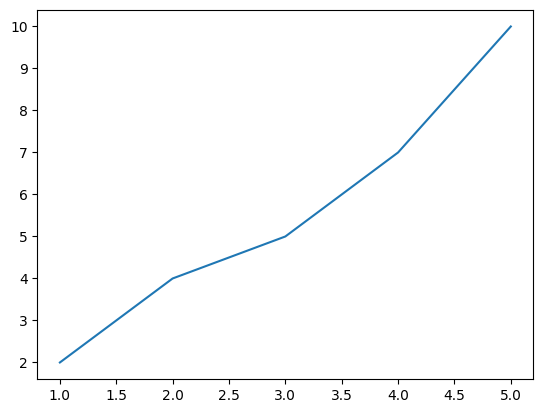

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,5,7,10]
plt.plot(x,y)


In [ ]:
l = [0,1,2,3,4,5]
if 2 <= l[2] <= 2:
  print("T")
else:
  print("F")

T


In [ ]:
#　　　　   ∧＿∧
#　　　  （・ω・  ）　ｶﾀｶﾀｶﾀｶﾀ
#　  ＿|￣￣||＿）)＿
#　／旦|――||/／ ／|
#　|￣￣￣￣￣|￣| .|
#　|＿＿＿＿＿|三|／
#
#      ∧__∧
#     (　･ω･)
#   ＿(__つ/￣￣￣/_
#       ＼/　pc　/　ｶﾀｶﾀ
#　 ／￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣
#＜　初期設定で実行すると2時間かかるよ
#